<a href="https://colab.research.google.com/github/yangste333/education_inequality/blob/main/Education_Inequality_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This file prepares test score data and education data alongside checking the data for issues and inconsistencies.

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

# Train-test splits
from sklearn.model_selection import train_test_split

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

## The data

This project utilizes two data sets. The primary data set is the EdGap data set from [EdGap.org](https://www.edgap.org/#5/37.875/-96.987). This data set from 2016 includes information about average ACT or SAT scores for schools and several socioeconomic characteristics of the school district. The secondary data set is basic information about each school from the [National Center for Education Statistics](https://nces.ed.gov/ccd/pubschuniv.asp).





### EdGap data

All socioeconomic data (household income, unemployment, adult educational attainment, and family structure) are from the Census Bureau's American Community Survey. 

[EdGap.org](https://www.edgap.org/#5/37.875/-96.987) report that ACT and SAT score data is from each state's department of education or some other public data release. The nature of the other public data release is not known.

The quality of the census data and the department of education data can be assumed to be reasonably high. 

[EdGap.org](https://www.edgap.org/#5/37.875/-96.987) do not indicate that they processed the data in any way. The data were assembled by the [EdGap.org](https://www.edgap.org/#5/37.875/-96.987) team, so there is always the possibility for human error. Given the public nature of the data, we would be able to consult the original data sources to check the quality of the data if we had any questions.

### School information data

The school information data is from the [National Center for Education Statistics](https://nces.ed.gov/ccd/pubschuniv.asp). This data set consists of basic identifying information about schools and can be assumed to be of reasonably high quality. As for the EdGap.org data, the school information data is public, so we would be able to consult the original data sources to check the quality of the data if we had any questions.


## Load the data

Load the EdGap
 data set

In [ ]:
edgap = pd.read_excel('https://raw.githubusercontent.com/yangste333/education_inequality/main/data/EdGap_data.xlsx')

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


Load the school information data

In [ ]:
!wget https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=0

--2023-04-17 21:14:19--  https://www.dropbox.com/s/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv [following]
--2023-04-17 21:14:20--  https://www.dropbox.com/s/raw/lkl5nvcdmwyoban/ccd_sch_029_1617_w_1a_11212017.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc58679902ec223d770ee2cb6f4e.dl.dropboxusercontent.com/cd/0/inline/B6WoBUIzMpZKJluCCv4oeqDCFPjQMz1vPI1u9MXxeLbbKews46N90yCLNw7PG40wchCz-ftC_6Te5GXJh2uX9xbC0k30E5JN_TrutbDG3DITwNKTpQlE_d01QAhgbJ89-43q9V4B1THts0NXRx6LafBmrDSdFSiJ2gNAeD-pMKh7lw/file# [following]
--2023-04-17 21:14:20--  https://uc58679902ec223d770ee2cb6f4e.dl.dropboxusercontent.com/cd/0/inline/B6WoBU

In [ ]:
school_info = pd.read_csv('ccd_sch_029_1617_w_1a_11212017.csv?dl=0', encoding='unicode_escape')

<ipython-input-12-da1a7837c049>:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_info = pd.read_csv('ccd_sch_029_1617_w_1a_11212017.csv?dl=0', encoding='unicode_escape')


## Explore the contents of the data sets

In [ ]:
edgap.head()

,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [ ]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   int64  
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 436.9 KB


In [ ]:
school_info.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported


In [ ]:
school_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

## Select relevant subsets of the data

We only need a few items from the School Info dataset - school year, IDs, state, zip code, type of school, and the level of school. So, we'll subselect those items to join with the EdGap dataset.

In [ ]:
school_info_lim = school_info[['SCHOOL_YEAR', 'NCESSCH', 'MSTATE', 'MZIP', 'SCH_TYPE_TEXT', 'LEVEL']]

In [ ]:
school_info_lim

,SCHOOL_YEAR,NCESSCH,MSTATE,MZIP,SCH_TYPE_TEXT,LEVEL
0,2016-2017,1.000020e+10,AL,35220,Alternative School,High
1,2016-2017,1.000020e+10,AL,36057,Alternative School,High
2,2016-2017,1.000020e+10,AL,36057,Alternative School,High
3,2016-2017,1.000020e+10,AL,36057,Alternative School,High
4,2016-2017,1.000020e+10,AL,35206,Alternative School,High
...,...,...,...,...,...,...
102178,2016-2017,7.800030e+11,VI,802,Regular School,Elementary
102179,2016-2017,7.800030e+11,VI,802,Regular School,Elementary
102180,2016-2017,7.800030e+11,VI,802,Regular School,Elementary
102181,2016-2017,7.800030e+11,VI,802,Regular School,Middle


In [ ]:
school_info_lim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   SCHOOL_YEAR    102183 non-null  object 
 1   NCESSCH        102181 non-null  float64
 2   MSTATE         102183 non-null  object 
 3   MZIP           102183 non-null  object 
 4   SCH_TYPE_TEXT  102181 non-null  object 
 5   LEVEL          102179 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.7+ MB


## Convert data types, if necessary

Notably, the School Info dataset has the id set as a "float". We're planning to join it with the EdGap dataset, which has the ID (the identifier for the school) set as an "int". As such, we want to change the data type of the SchoolInfo dataset ID to an int as well.

In [ ]:
school_info_lim['NCESSCH'] = school_info_lim['NCESSCH'].fillna(0.0).astype('int')
school_info_lim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   SCHOOL_YEAR    102183 non-null  object
 1   NCESSCH        102183 non-null  int64 
 2   MSTATE         102183 non-null  object
 3   MZIP           102183 non-null  object
 4   SCH_TYPE_TEXT  102181 non-null  object
 5   LEVEL          102179 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.7+ MB


<ipython-input-20-38f12f59da1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_info_lim['NCESSCH'] = school_info_lim['NCESSCH'].fillna(0.0).astype('int')


## Are the data suitable for answering the question?

We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

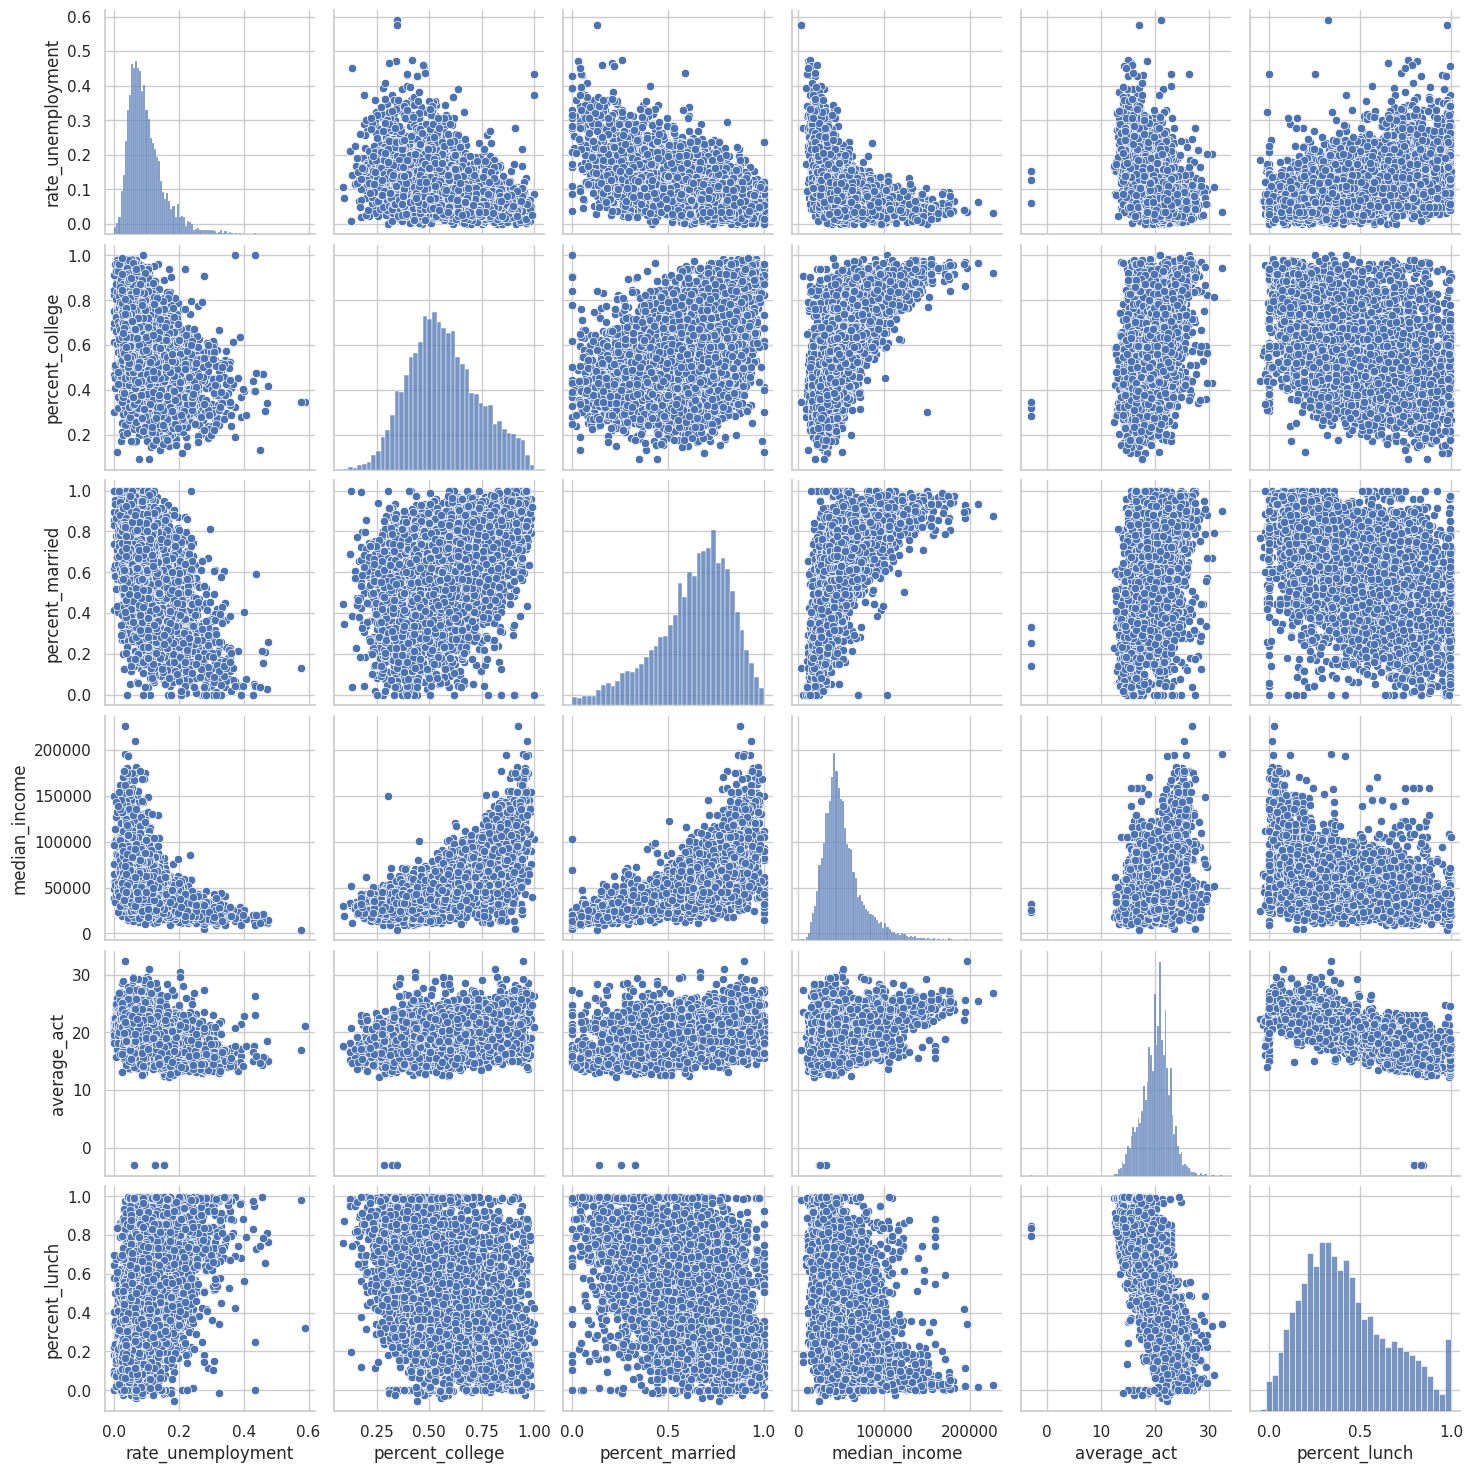

In [ ]:
sns.pairplot(edgap.drop(columns='id'))

## Rename columns

In [ ]:
edgap = edgap.rename(columns={"NCESSCH School ID":"id", 
              "CT Pct Adults with College Degree":"percent_college",        
              "CT Unemployment Rate":"rate_unemployment", 
              "CT Pct Childre In Married Couple Family":"percent_married",
              "CT Median Household Income":"median_income",
              "School ACT average (or equivalent if SAT score)":"average_act",
              "School Pct Free and Reduced Lunch":"percent_lunch"})

Rename the columns `SCHOOL_YEAR`, `NCESSCH`, `MSTATE`, `MZIP`, `SCH_TYPE_TEXT`, `LEVEL` to `year`, `id`, `state`, `zip_code`, `school_type`, `school_level`

In [ ]:
school_info_lim = school_info_lim.rename(columns = {'SCHOOL_YEAR':'year',
                                                    'NCESSCH':'id',
                                                    'MSTATE':'state',
                                                    'MZIP':'zip_code',
                                                    'SCH_TYPE_TEXT':'school_type',
                                                    'LEVEL':'school_level'})

In [ ]:
school_info_lim

,year,id,state,zip_code,school_type,school_level
0,2016-2017,10000200277,AL,35220,Alternative School,High
1,2016-2017,10000201667,AL,36057,Alternative School,High
2,2016-2017,10000201670,AL,36057,Alternative School,High
3,2016-2017,10000201705,AL,36057,Alternative School,High
4,2016-2017,10000201706,AL,35206,Alternative School,High
...,...,...,...,...,...,...
102178,2016-2017,780003000025,VI,802,Regular School,Elementary
102179,2016-2017,780003000026,VI,802,Regular School,Elementary
102180,2016-2017,780003000027,VI,802,Regular School,Elementary
102181,2016-2017,780003000033,VI,802,Regular School,Middle


## Join data frames 

We will merge by the EdGap data, since we don't need all of the data in the School Info dataset. Thus, we'll join on the EdGap data.

In [ ]:
merged = pd.merge(edgap, school_info_lim, how='left', on='id')

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7986 entries, 0 to 7985
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   int64  
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zip_code           7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 811.1+ KB


## Quality Control

Check for out-of-range values or values that do not match what we want to analyze. Either set values to `NaN` or remove the observations, as appropriate.

For example, in the percent_lunch data, some of the data is less than zero, which doesn't make sense.

<Axes: xlabel='percent_lunch', ylabel='Count'>

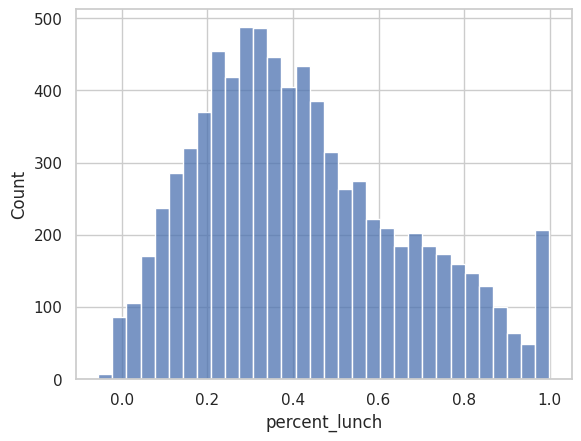

In [ ]:
sns.histplot(merged, x='percent_lunch')

Similarly, the Average ACT score shouldn't be less than 1, but some of the values are negative. We'll remove those "bad pieces of data".

<Axes: xlabel='average_act', ylabel='Count'>

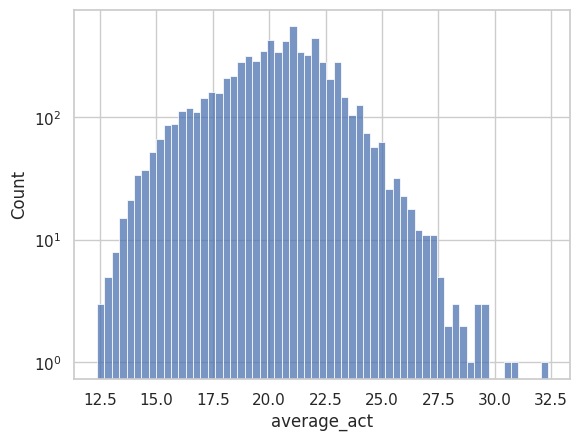

In [ ]:
sns.histplot(merged, x='average_act', log_scale = (False, True))

In [ ]:
merged.loc[merged['percent_lunch'] < 0, 'percent_lunch'] = np.nan
merged.loc[merged['average_act'] < 1, 'average_act'] = np.nan
merged

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High
...,...,...,...,...,...,...,...,...,...,...,...,...
7981,560530200294,0.034549,0.590780,0.720077,64891.0,18.500000,0.232156,2016-2017,WY,82902,Regular School,High
7982,560569000311,0.069538,0.633860,0.808841,44603.0,22.300000,0.083871,2016-2017,WY,82833,Regular School,High
7983,560569500360,0.035159,0.764566,0.776570,44896.0,21.500000,0.184829,2016-2017,WY,82801,Regular School,High
7984,560576200324,0.063877,0.670532,0.879324,92134.0,19.700000,0.112583,2016-2017,WY,82935,Regular School,High


In [ ]:
merged[merged['average_act'] < 1]

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level


In [ ]:
merged[merged['percent_lunch'] < 0]

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level


There's also one or two things that we (probably) want to adjust - school types. Notably:

In [ ]:
merged['school_type'].value_counts()

Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: school_type, dtype: int64

In [ ]:
merged['school_level'].value_counts()

High            7230
Other            631
Not reported      35
Elementary         2
Name: school_level, dtype: int64

...there's some weird school types - apparently elementary schools have ACT averages?

That's not really an even playing field and isn't what we're looking for. For now, we'll just stick with High Schools - so we'll subselect that.

In [ ]:
merged = merged[merged['school_level'] == 'High']
merged['school_level'].value_counts()

High    7230
Name: school_level, dtype: int64

In [ ]:
merged['school_type'].value_counts()

Regular School                 7218
Alternative School                9
Special Education School          2
Career and Technical School       1
Name: school_type, dtype: int64

## Identify missing values

Determine whether there are missing values in the data set.

<Axes: >

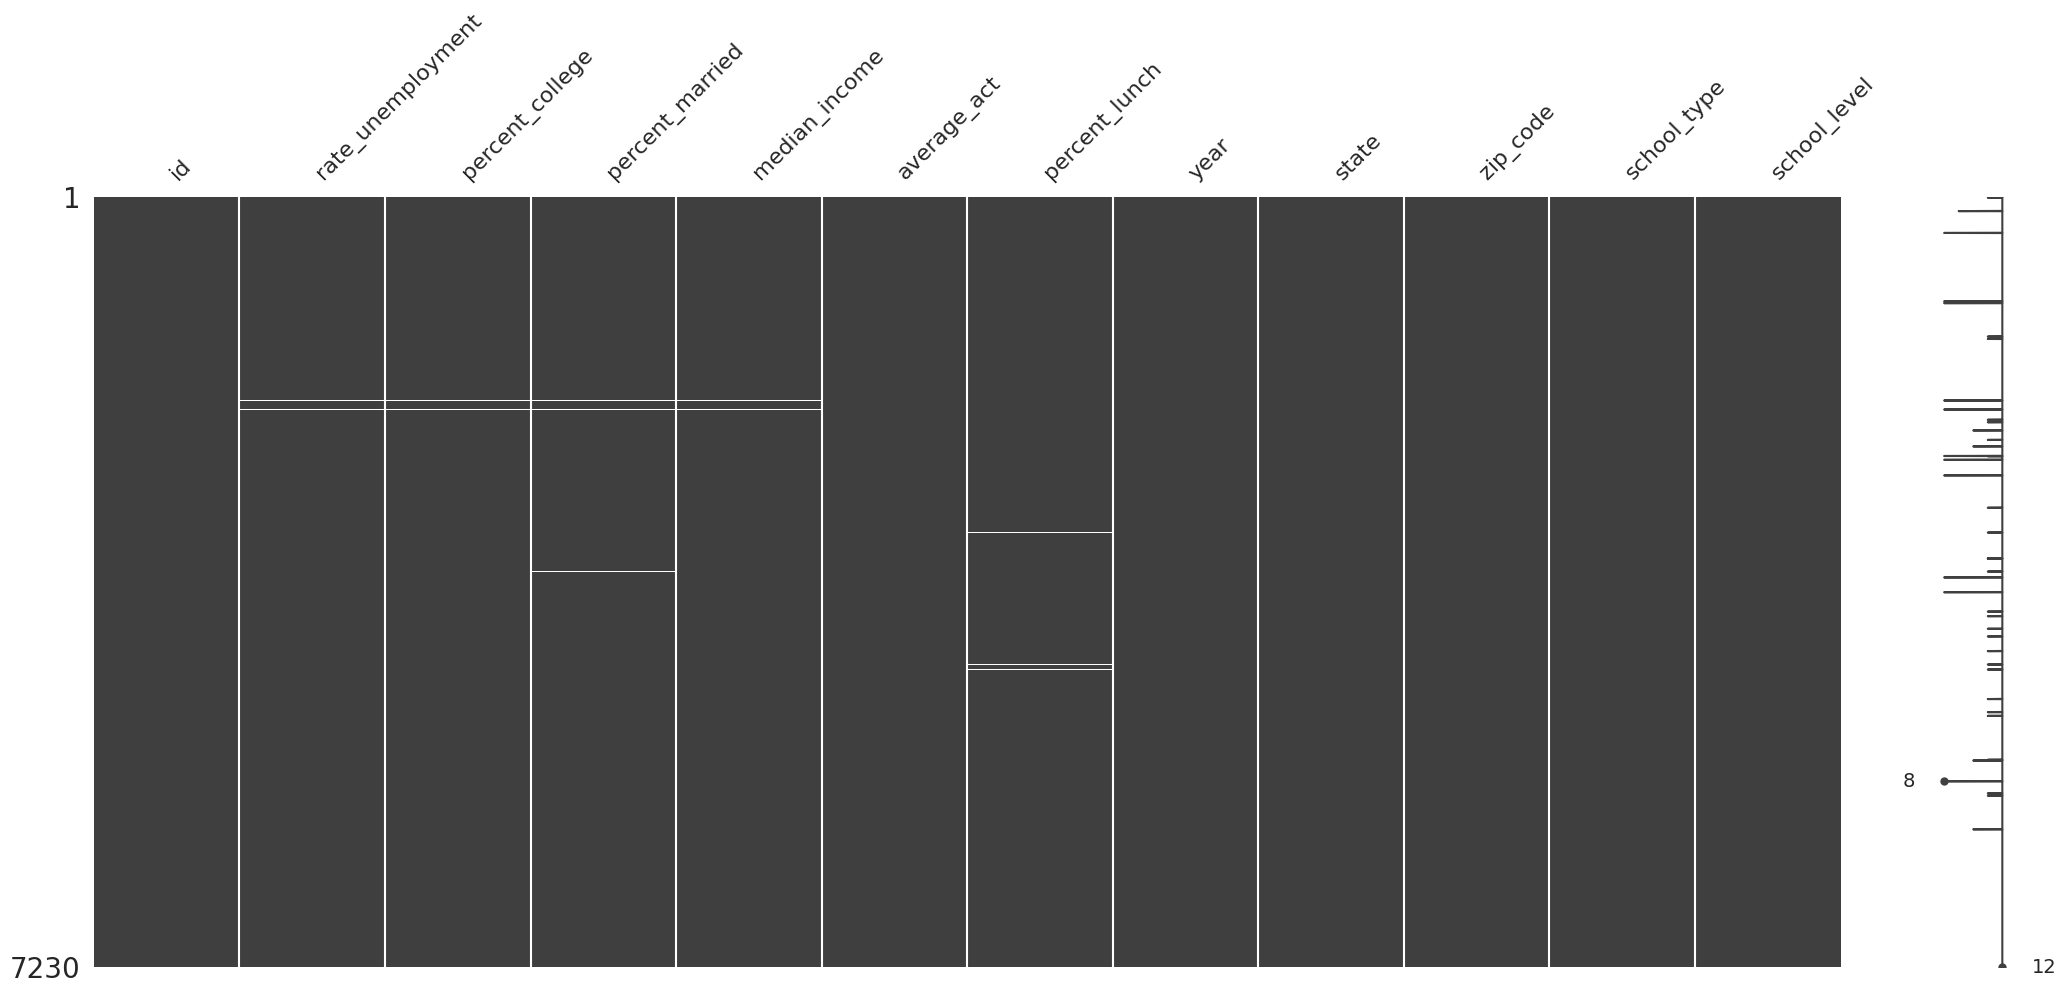

In [ ]:
msno.matrix(merged)

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7230 entries, 0 to 7985
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7230 non-null   int64  
 1   rate_unemployment  7218 non-null   float64
 2   percent_college    7219 non-null   float64
 3   percent_married    7210 non-null   float64
 4   median_income      7214 non-null   float64
 5   average_act        7227 non-null   float64
 6   percent_lunch      7210 non-null   float64
 7   year               7230 non-null   object 
 8   state              7230 non-null   object 
 9   zip_code           7230 non-null   object 
 10  school_type        7230 non-null   object 
 11  school_level       7230 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 734.3+ KB


In [ ]:
merged.isna().sum()

id                    0
rate_unemployment    12
percent_college      11
percent_married      20
median_income        16
average_act           3
percent_lunch        20
year                  0
state                 0
zip_code              0
school_type           0
school_level          0
dtype: int64

We will worry about this later.

## Export the clean .csv files

Export files with the training and testing data

In [ ]:
from google.colab import files

melted.to_csv('clean_education_info.csv', encoding = 'utf-8-sig', index=False)
files.download('clean_education_info.csv')